To get around Colab's Markdown display issues and potential issues with the `plotly` library, the questions in this problem set are rendered in code blocks. Simply re-run the associated code block to re-render the question, if needed.

As a benefit, the questions will come with occasional hints about your programming environment.

Make sure the file `PS7.py` is in the same directory as this notebook. This file contains the question definitions and helper functions for this dataset. Do not modify this file.

If you do use Google Colab, make the notebook editable for the TAs, and provide the share link to the notebook below. Please share the notebook you worked on, and not a copy of it.

**Make sure the 'notify' checkbox is <i>not</i> checked when sharing the notebook.**

--------


link to Colab: https://colab.research.google.com/github/emilklo/amlberkeley/blob/main/PS7/INFO251_S25_PS7.ipynb#scrollTo=VtHeSO2bqyuP

(leave blank if not using Colab)

In [2]:
# download necessary packages
%pip install sentence-transformers plotly datasets transformers "transformers[torch]"

In [3]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import seaborn as sns
sns.set_style()

import torch.nn as nn
import torch.nn.functional as F

import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
!wget https://raw.githubusercontent.com/emilklo/amlberkeley/main/PS7/PS7.py
!pip install datasets


import PS7

--2025-05-06 07:00:04--  https://raw.githubusercontent.com/emilklo/amlberkeley/main/PS7/PS7.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22763 (22K) [text/plain]
Saving to: ‘PS7.py.3’

PS7.py.3            100%[===================>]  22.23K  --.-KB/s    in 0s      

2025-05-06 07:00:04 (45.1 MB/s) - ‘PS7.py.3’ saved [22763/22763]

PS7 helper functions loaded [6a7fa96a6737421c2fed37cdfb4b7031]. Running in Colab: True
A GPU is available in this runtime. Make sure to use the GPU for deep-learning tasks.


<IPython.core.display.Javascript object>

In [4]:
PS7.intro()

<IPython.core.display.Javascript object>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

In [6]:
PS7.q0()

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 0 - your answers here</b></span>



In [7]:
PS7.part1()

<IPython.core.display.Javascript object>

In [8]:
PS7.q1()

<IPython.core.display.Javascript object>

In [9]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(
    subset='all', remove=('headers', 'footers', 'quotes')
)

# your code here
print(f"Number of documents: {len(newsgroups.data)}")
print(f"Categories: {newsgroups.target_names}")
print("Example document:")
print(newsgroups.data[0])
print(f"Label: {newsgroups.target_names[newsgroups.target[0]]}")


Number of documents: 18846
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Example document:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 1 - your answers here</b></span>

a) The data is a collection of about 19,000 newsgroup posts from 20 online discussion topics. Each data point is a newsgroup post text document. Every document is labeled with one of 20 newsgroup categories.

b) For each text post, the prediction target is the category it belongs to.
This is represented by the target field in the dataset as an integer which maps to the category in target_names. There are 20 classes to predict.

c) No, newsgroups["data"] cannot be passed directly to a LogisticRegression method. newsgroups["data"] is a list of raw text strings, and LogisticRegression expects numerical input.



In [10]:
PS7.q2()

<IPython.core.display.Javascript object>

In [11]:
from sklearn.datasets import fetch_20newsgroups_vectorized

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

subset_size = 2000

# your code here
vectorized = fetch_20newsgroups_vectorized(subset='all')
X_tfidf = vectorized.data[:subset_size].toarray()
print(X_tfidf.shape)

raw_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = raw_data.data[:subset_size]

import torch

if torch.cuda.is_available():
	device = 'cuda'
elif torch.backends.mps.is_available():
	device = 'mps'
else:
	device = 'cpu'

print(device)
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

truncation_limit = 256
num_truncated = 0
for text in texts:
    num_tokens = len(tokenizer.encode(text, truncation=True, add_special_tokens=True))
    if num_tokens >= truncation_limit:
        num_truncated += 1
print(f"Estimated number of truncated texts: {num_truncated} out of {subset_size}")


!pip install -q sentence-splitter
from sentence_splitter import SentenceSplitter
splitter = SentenceSplitter(language='en')

from tqdm import tqdm
import numpy as np

document_embeddings = []

for doc in tqdm(texts[:subset_size]):
    sentences = splitter.split(doc)
    if len(sentences) == 0:
        document_embeddings.append(np.zeros(384))
        continue
    sentence_embeddings = model.encode(sentences, batch_size=16, device=device)
    doc_embedding = np.mean(sentence_embeddings, axis=0)
    document_embeddings.append(doc_embedding)

X_embed = np.vstack(document_embeddings)
print("X_embed shape:", X_embed.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(2000, 130107)
cuda
Estimated number of truncated texts: 484 out of 2000


100%|██████████| 2000/2000 [00:36<00:00, 55.36it/s]

X_embed shape: (2000, 384)


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 2 - your answers here</b></span>

a) 484 data points out of the first 2000 run into the models truncation limit

b) (2000, 130107) and (2000, 384)

In [12]:
PS7.q3()

<IPython.core.display.Javascript object>

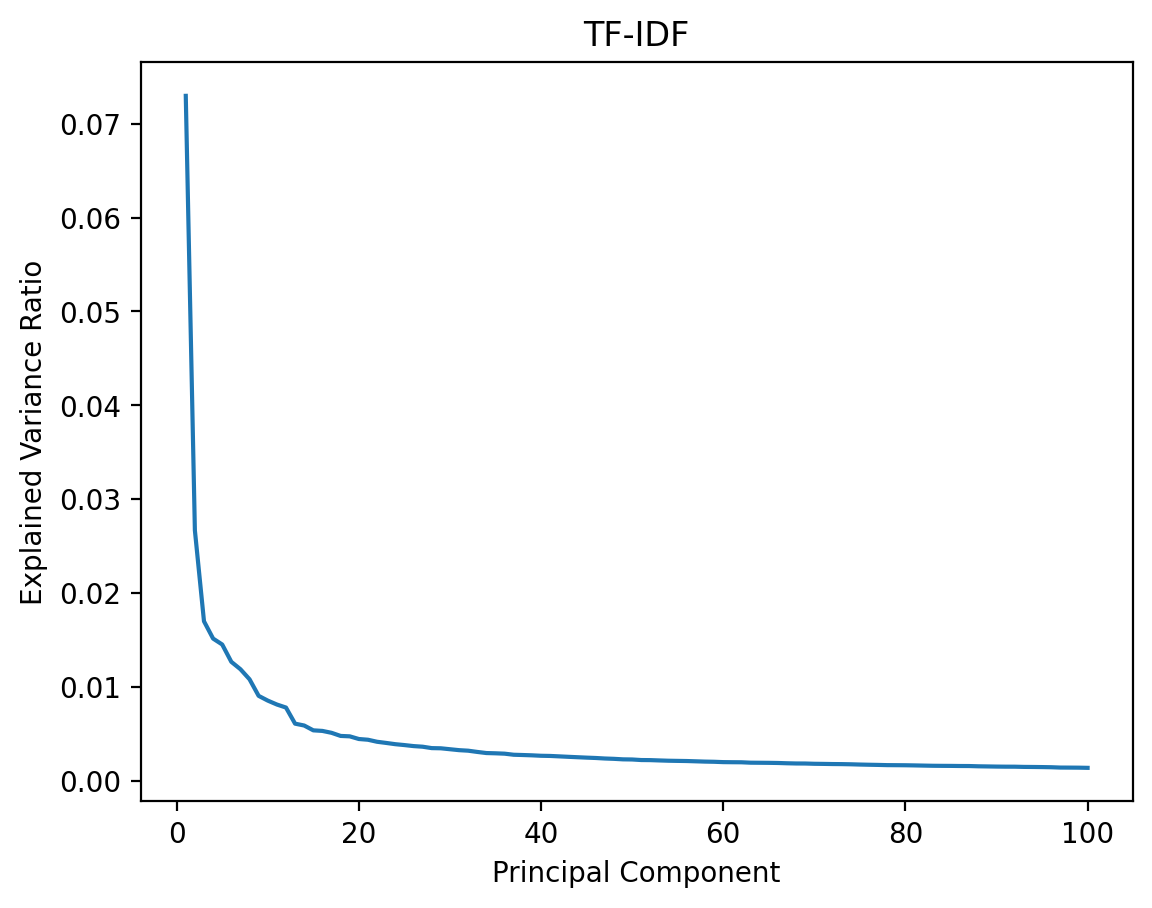

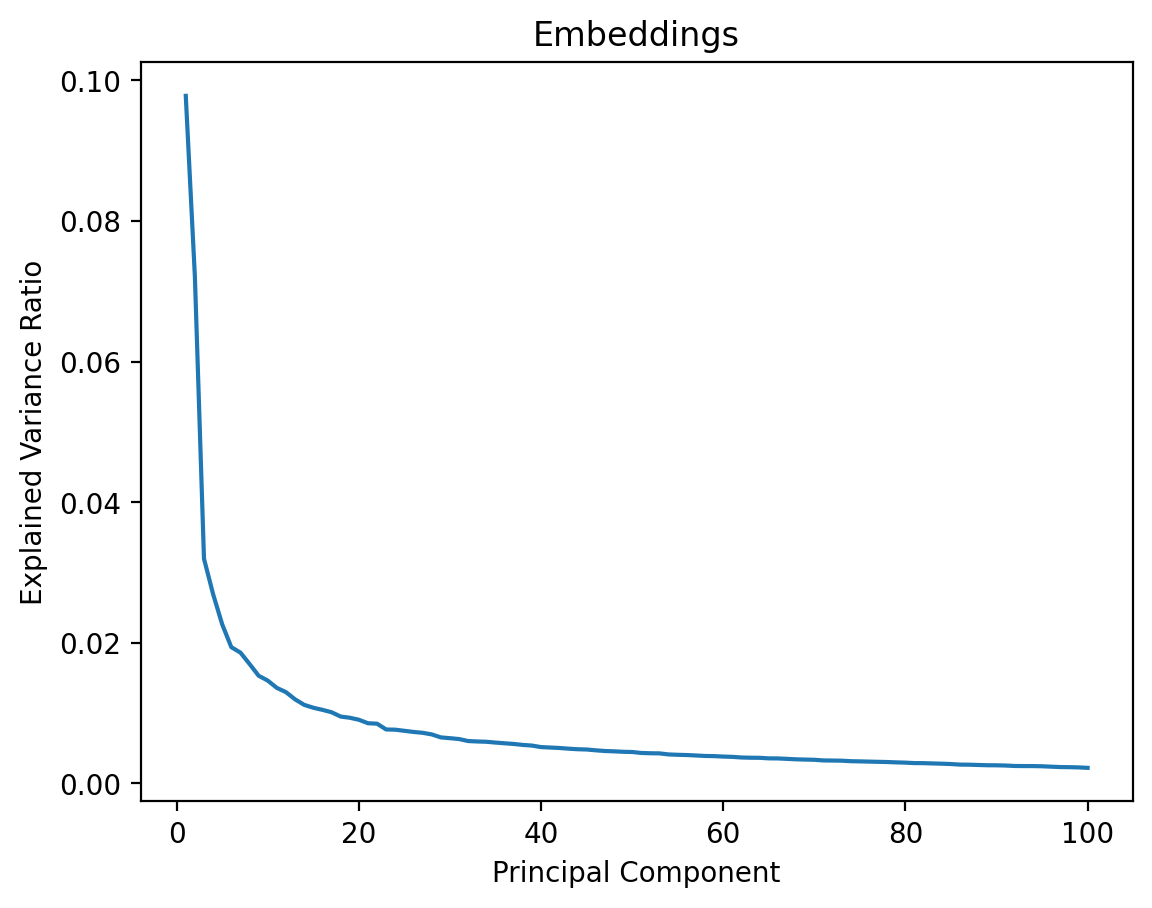

TF-IDF: Variation lost with 3 PCs: 88.34%
Embeddings:Variation lost with 3 PCs: 79.81%


<IPython.core.display.Javascript object>

In [13]:
from sklearn.decomposition import PCA

# your code here
pca_tfidf = PCA(n_components=100, svd_solver='randomized', random_state=42)
var_tfidf = pca_tfidf.fit(X_tfidf).explained_variance_ratio_

plt.figure()
plt.plot(range(1, 101), var_tfidf)
plt.title('TF-IDF')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

pca_embed = PCA(n_components=100, svd_solver='randomized', random_state=42)
var_embed = pca_embed.fit(X_embed).explained_variance_ratio_

plt.figure()
plt.plot(range(1, 101), var_embed)
plt.title('Embeddings')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

loss_tfidf = 1 - var_tfidf[:3].sum()
loss_embed = 1 - var_embed[:3].sum()

print(f"TF-IDF: Variation lost with 3 PCs: {loss_tfidf:.2%}")
print(f"Embeddings:Variation lost with 3 PCs: {loss_embed:.2%}")

<span style="color:#FDB515"><b>Question 3 - your answers here</b></span>

a) For TF-IDF the curve starts above 7% for the first PC, then drops to around 2%, and continues a very gradual decreasing tail towards near 0 by PC 100. This tail shows that the tf-idf space is very high-dimensional and variance is spread over thousands of features, so each component beyond the first few captures only a tiny sliver of variance.

For the embeddings variant the first PC captures roughly 10%, the second about 3.2 %, the third 2.0 %, and then it falls off more steeply before settling into a lower tail. This indicates the 384-dimensional embedding space is much more compressible: a handful of PCs explain a sizeable chunk of the variance, unlike the tf-idf case.

b) TF-IDF
You lose about 88.3 % of the total variance, retaining only ∼11.7 % in the first three components.

Embeddings
You lose about 79.8 % of the variance, retaining ∼20.2 % in the first three components.

In [14]:
PS7.q4()

<IPython.core.display.Javascript object>

In [15]:
import plotly.express as px

# your code here
labels = raw_data.target[:subset_size]
names = raw_data.target_names

pca3_tfidf = PCA(n_components=3, random_state=42)
X_tfidf_3 = pca3_tfidf.fit_transform(X_tfidf)

pca3_embed = PCA(n_components=3, random_state=42)
X_embed_3 = pca3_embed.fit_transform(X_embed)

sum3_from100_tfidf = var_tfidf[:3].sum()
sum3_from3_tfidf  = pca3_tfidf.explained_variance_ratio_.sum()
print(f"TF-IDF: 100‐PC sum3 = {sum3_from100_tfidf:.4f}, 3‐PC fit sum = {sum3_from3_tfidf:.4f}")

sum3_from100_embed = var_embed[:3].sum()
sum3_from3_embed  = pca3_embed.explained_variance_ratio_.sum()
print(f"Embed: 100‐PC sum3 = {sum3_from100_embed:.4f}, 3‐PC fit sum = {sum3_from3_embed:.4f}")

fig_tfidf = px.scatter_3d(
    x=X_tfidf_3[:,0], y=X_tfidf_3[:,1], z=X_tfidf_3[:,2],
    color=[names[i] for i in labels],
    title="3D PCA of TF-IDF Features",
    labels={'x':'PC1','y':'PC2','z':'PC3'}
)
fig_tfidf.show()

fig_embed = px.scatter_3d(
    x=X_embed_3[:,0], y=X_embed_3[:,1], z=X_embed_3[:,2],
    color=[names[i] for i in labels],
    title="3D PCA of Sentence Embeddings",
    labels={'x':'PC1','y':'PC2','z':'PC3'}
)
fig_embed.show()

TF-IDF: 100‐PC sum3 = 0.1166, 3‐PC fit sum = 0.1166
Embed: 100‐PC sum3 = 0.2019, 3‐PC fit sum = 0.2019


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 4 - your answers here</b></span>

a) Yes. When I sum the first three explained‐variance ratios from the 100-component PCA and compare it to the variance from a direct 3-component PCA, I get the exact same numbers. This shows that PCA always allocates the same total variance to the top k components whether I ask for k directly or slice them off a larger decomposition.

b) Yes. The first three eigenvectors of the covariance matrix are the same for 3 or 100.

c) For the tf-idf plot, the data points almost looks like they are scattered randomly. Light green for example, can be seen top left and right, bottom left and right, and center. Clusters bleed into each other because raw word count patterns capture surface overlap. “drive” appears in both comp.sys.ibm.pc.hardware and rec.motorcycles.

For the embeddings plot, the clusters are noticeably tighter and more separated, reflecting that the MiniLM model has learned deeper semantic distinctions. It looks like some groups have clustered together, indicating that some topics have similarities with each other.

In [16]:
PS7.part2()

<IPython.core.display.Javascript object>

In [17]:
PS7.q5()

<IPython.core.display.Javascript object>

In [18]:
from sklearn.metrics import pairwise_distances_argmin

def k_means_clustering(X, k, random_state=None):
    # your code here
    rng = np.random.default_rng(random_state)
    # choosing centroids
    init_idx = rng.choice(X.shape[0], size=k, replace=False)
    centroids = X[init_idx]

    for i in range(1, 101):
        labels = pairwise_distances_argmin(X, centroids)

        new_centroids = np.vstack([
            X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
            for j in range(k)
        ])

        # convergance check
        shift = np.linalg.norm(new_centroids - centroids, axis=1).max()
        centroids = new_centroids
        if shift < 1e-4:
            break

    return centroids, labels, i

k = 20
centroids, labels, n_iters = k_means_clustering(X_embed_3, k)

print(f"Converged in {n_iters} iterations")
print(f"Centroids shape: {centroids.shape}")
print(f"Labels shape: {labels.shape}")

Converged in 36 iterations
Centroids shape: (20, 3)
Labels shape: (2000,)


<IPython.core.display.Javascript object>

In [19]:
PS7.q6()

<IPython.core.display.Javascript object>

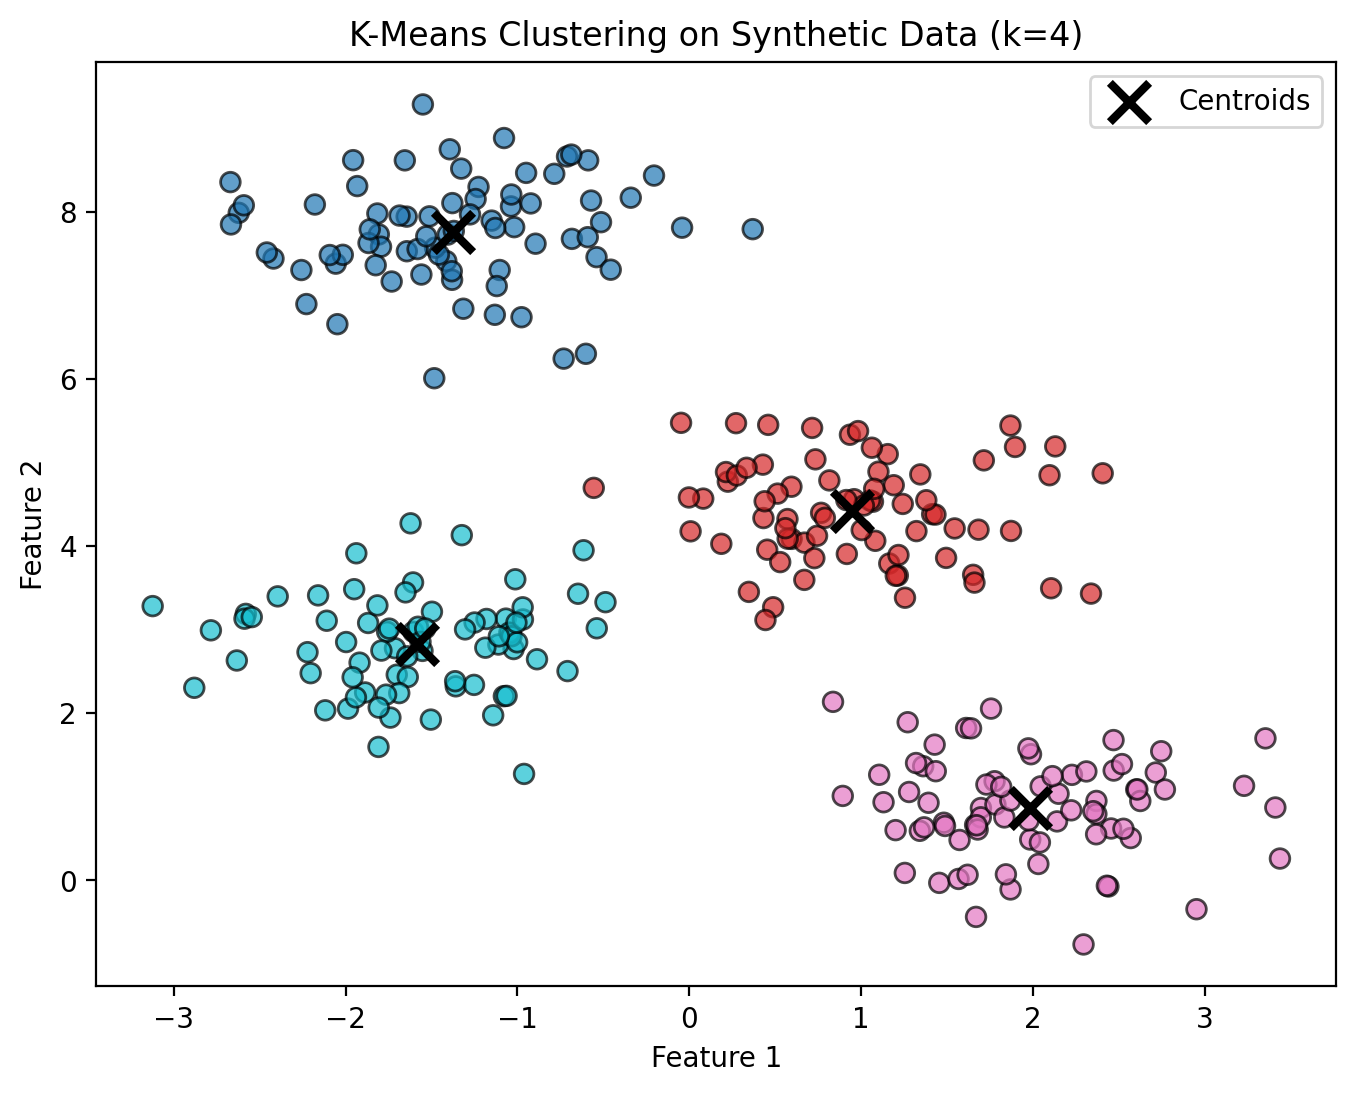

<IPython.core.display.Javascript object>

In [20]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# visualize the synthetic dataset to choose the number of clusters
# plt.scatter(X[:, 0], X[:, 1], s=50)

# your code here
k = 4
centroids, labels, n_iters = k_means_clustering(X, k)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='tab10', edgecolor='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.title(f'K-Means Clustering on Synthetic Data (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [21]:
PS7.q7()

<IPython.core.display.Javascript object>

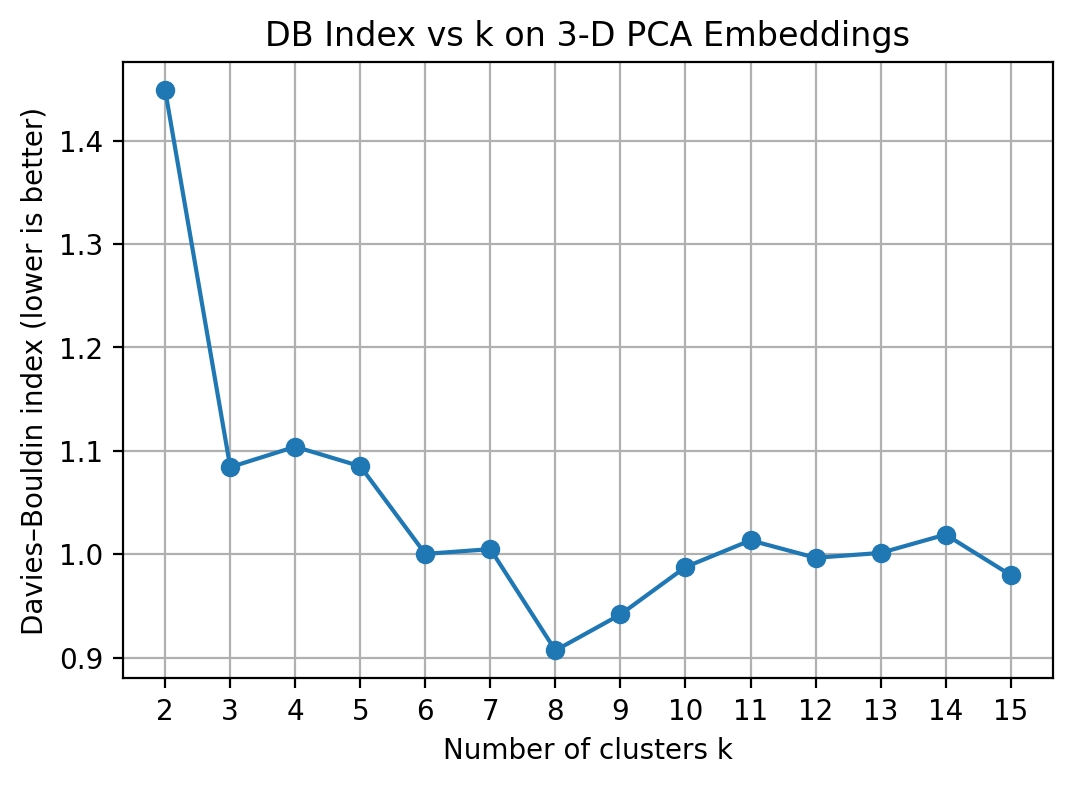

<IPython.core.display.Javascript object>

In [22]:
# your code here
def davies_bouldin_index(X, labels, centroids):
    k = centroids.shape[0]

    S = np.zeros(k)
    for i in range(k):
        members = X[labels == i]
        if len(members) > 0:
            dists = np.linalg.norm(members - centroids[i], axis=1)
            S[i] = dists.mean()
        else:
            S[i] = 0.0

    R = np.zeros((k, k))
    D = np.linalg.norm(centroids[:, None] - centroids[None, :], axis=2)
    for i in range(k):
        for j in range(k):
            if i != j and D[i, j] > 0:
                R[i, j] = (S[i] + S[j]) / D[i, j]
    R_i = R.max(axis=1)

    return R_i.mean()

db_scores = []
ks = list(range(2, 16))
for k in ks:
    centroids, labels, _ = k_means_clustering(X_embed_3, k)
    db = davies_bouldin_index(X_embed_3, labels, centroids)
    db_scores.append(db)

plt.figure(figsize=(6,4))
plt.plot(ks, db_scores, marker='o')
plt.xticks(ks)
plt.xlabel("Number of clusters k")
plt.ylabel("Davies–Bouldin index (lower is better)")
plt.title("DB Index vs k on 3-D PCA Embeddings")
plt.grid(True)
plt.show()


<span style="color:#FDB515"><b>Question 7 - your answers here</b></span>

c) According to the index, the sweet spot is 8 clusters, which is fewer than the 20 original newsgroup labels. This tells us that while there are twenty topics, the data really condenses into a handful of broader themes. It aligns perfectly with what q4c told us: documents naturally group into larger topics like computer forums, science, and recreation rather than twenty completely separate islands. The eight clusters capture the major semantic divides observed in the 3D PCA plot for embeddings.

In [23]:
PS7.part3()

<IPython.core.display.Javascript object>

In [24]:
PS7.q8()

<IPython.core.display.Javascript object>

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score
from PS7 import newsgroups_tokenized_datasets

# tokenize the training and validation datasets and handle padding tokens (done for you)
base_model = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(base_model)
trn_dataset, val_dataset = newsgroups_tokenized_datasets(tokenizer)

Map (num_proc=4):   0%|          | 0/11314 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/7532 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

In [26]:
# instantiate the model

# hint: pass in pad_token_id=tokenizer.pad_token_id
model = AutoModelForSequenceClassification.from_pretrained(
    base_model,
    num_labels=20,
    pad_token_id=tokenizer.pad_token_id
)

# hyperparameters
args = TrainingArguments(
    output_dir="./ft-distilgpt2",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_strategy="no",
    logging_steps=100,
    report_to="none",
    load_best_model_at_end=True
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, preds)}

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=trn_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()
metrics = trainer.evaluate()
print(f"Validation accuracy: {metrics['eval_accuracy']:.2%}")

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-26-bb294d220758>:29: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Step,Training Loss
100,3.296300
200,2.410100
300,1.727100
400,1.470500
500,1.331300
600,1.274900
700,1.161700
800,1.091300
900,1.023700
1000,1.052700


Validation accuracy: 66.97%


<IPython.core.display.Javascript object>

In [27]:
train_metrics = trainer.evaluate(eval_dataset=trn_dataset)
print(f"Train accuracy: {train_metrics['eval_accuracy']:.2%}")

Train accuracy: 76.44%


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 8 - your answers here</b></span>

hyperparameters:

Epochs: 3

Batch sizes: 16

Learning rate: 2 * 10^-5

Weight decay: 0.01

train accuracy: 76.37%

test accuracy: 67.26%

In [28]:
PS7.q9()

<IPython.core.display.Javascript object>

In [29]:
# your code here
from sklearn.linear_model import LogisticRegressionCV

tfidf_train = fetch_20newsgroups_vectorized(subset='train')
X_tfidf_train = tfidf_train.data
y_train = tfidf_train.target

tfidf_test = fetch_20newsgroups_vectorized(subset='test')
X_tfidf_test = tfidf_test.data
y_test = tfidf_test.target


lr_tfidf = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10],
    cv=5,
    penalty='l2',
    solver='saga',
    max_iter=1000,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
lr_tfidf.fit(X_tfidf_train, y_train)

train_acc_tfidf = lr_tfidf.score(X_tfidf_train, y_train)
test_acc_tfidf = lr_tfidf.score(X_tfidf_test,  y_test)
best_C_tfidf = lr_tfidf.C_[0]

model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

raw_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))
X_embed_train = model.encode(raw_train.data, batch_size=32, show_progress_bar=True)
y_train_embed = raw_train.target

raw_test = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'))
X_embed_test = model.encode(raw_test.data,  batch_size=32, show_progress_bar=True)
y_test_embed = raw_test.target

lr_embed = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10],
    cv=5,
    penalty='l2',
    solver='saga',
    max_iter=1000,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
lr_embed.fit(X_embed_train, y_train_embed)

train_acc_embed = lr_embed.score(X_embed_train, y_train_embed)
test_acc_embed = lr_embed.score(X_embed_test,  y_test_embed)
best_C_embed = lr_embed.C_[0]

print("TF-IDF Logistic Regression")
print(f"Best C = {best_C_tfidf}")
print(f"Train acc = {train_acc_tfidf:.2%}")
print(f"Test  acc = {test_acc_tfidf:.2%}\n")

print("MiniLM Embeddings Logistic Regression")
print(f"Best C = {best_C_embed}")
print(f"Train acc = {train_acc_embed:.2%}")
print(f"Test acc = {test_acc_embed:.2%}")

Batches:   0%|          | 0/354 [00:00<?, ?it/s]

Batches:   0%|          | 0/236 [00:00<?, ?it/s]

TF-IDF Logistic Regression
Best C = 10.0
Train acc = 99.46%
Test  acc = 79.53%

MiniLM Embeddings Logistic Regression
Best C = 1.0
Train acc = 77.13%
Test acc = 68.37%


<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Question 9 - your answers here</b></span>

tf-idf hyperparameters:

LogisticRegressionCV with

Cs = [0.01, 0.1, 1, 10]

penalty = l2

cv = 5

max_iter = 1000

Best C = 10.0

tf-idf train accuracy: 99.46 %

tf-idf test accuracy: 79.53 %

miniLM hyperparameters:

LogisticRegressionCV with

Cs = [0.01, 0.1, 1, 10]

penalty = l2

cv = 5

max_iter = 1000

Best C = 1.0

miniLM train accuracy: 77.13 %

miniLM test accuracy: 68.37 %

discussion: tf-idf logistic regression did well with 99% train and 80% test using a huge sparse matrix. MiniLM-based logistic regression and fine-tuned distilgpt2 both hovered around 68%–77% accuracy, but MiniLM LR trains quickly on a 384-d space and stays transparent, whereas distilgpt2 needs a lot of compute and remains a black box.

In [30]:
PS7.ec1()

<IPython.core.display.Javascript object>

In [43]:
# your code here

<IPython.core.display.Javascript object>

<span style="color:#FDB515"><b>Extra credit 1 - your answers here</b></span>

a) PCA is a linear transform that projects data onto orthogonal axes with maximal variance, t-SNE is a nonlinear method that models pairwise similarities as probabilities and minimizes the divergence between high and low dimensional distributions. PCA is deterministic and fast, while t-SNE typically uncovers tight clusters and local groupings at the cost of runtime performance.

b)


In [41]:
PS7.ec2()

<IPython.core.display.Javascript object>

In [ ]:

class SelfAttention(nn.Module):
    def __init__(self, d_embedding):
        """
        d_embedding: int, the dimension of the input embedding
        """
        super().__init__()
        # your code here
        ...


    def forward(self, x):
        # your code here
        ...

def attention_classifier(num_classes):
    # create an embedding layer and freeze it so that it won't be updated
    embed = nn.Embedding.from_pretrained(..., freeze=True)
    d_embedding = embed.embedding_dim

    # your implemented attention layer
    attn = SelfAttention(d_embedding=d_embedding)

    # classifier head
    return nn.Sequential(
        embed,                      # tokens -> word vectors
        attn,                       # self‑attention
        nn.AdaptiveAvgPool1d(1),    # mean-pool over the sequence of words
        nn.Flatten(),
        nn.Linear(d_embedding, num_classes)  # classifier
    )


In [ ]:
PS7.ec3()

In [ ]:
# your code here

<span style="color:#FDB515"><b>Extra credit 3 - your answers here</b></span>

